In [448]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [449]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [450]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [451]:
# You can also drop whichever other columns you'd like here
titanic_df.drop(["Cabin","Name","Ticket","PassengerId"], axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [452]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [453]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,False,True
1,1,1,38.0,1,0,71.2833,C,True,False
2,1,3,26.0,0,0,7.9250,S,True,False
3,1,1,35.0,1,0,53.1000,S,True,False
4,0,3,35.0,0,0,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [454]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [455]:
# Create variable X for independant variables and y for dependant variable
X = titanic_df.iloc[:,1:].values
y = titanic_df.iloc[:,0].values

In [456]:
# Split the variables in the data into train, test and developement sets
r = 4
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=r)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.20, random_state=r)

In [457]:
# Train the upruned decision tree classifier
clf_unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
clf_unpruned.fit(X_train, y_train)

DecisionTreeClassifier(random_state=4)

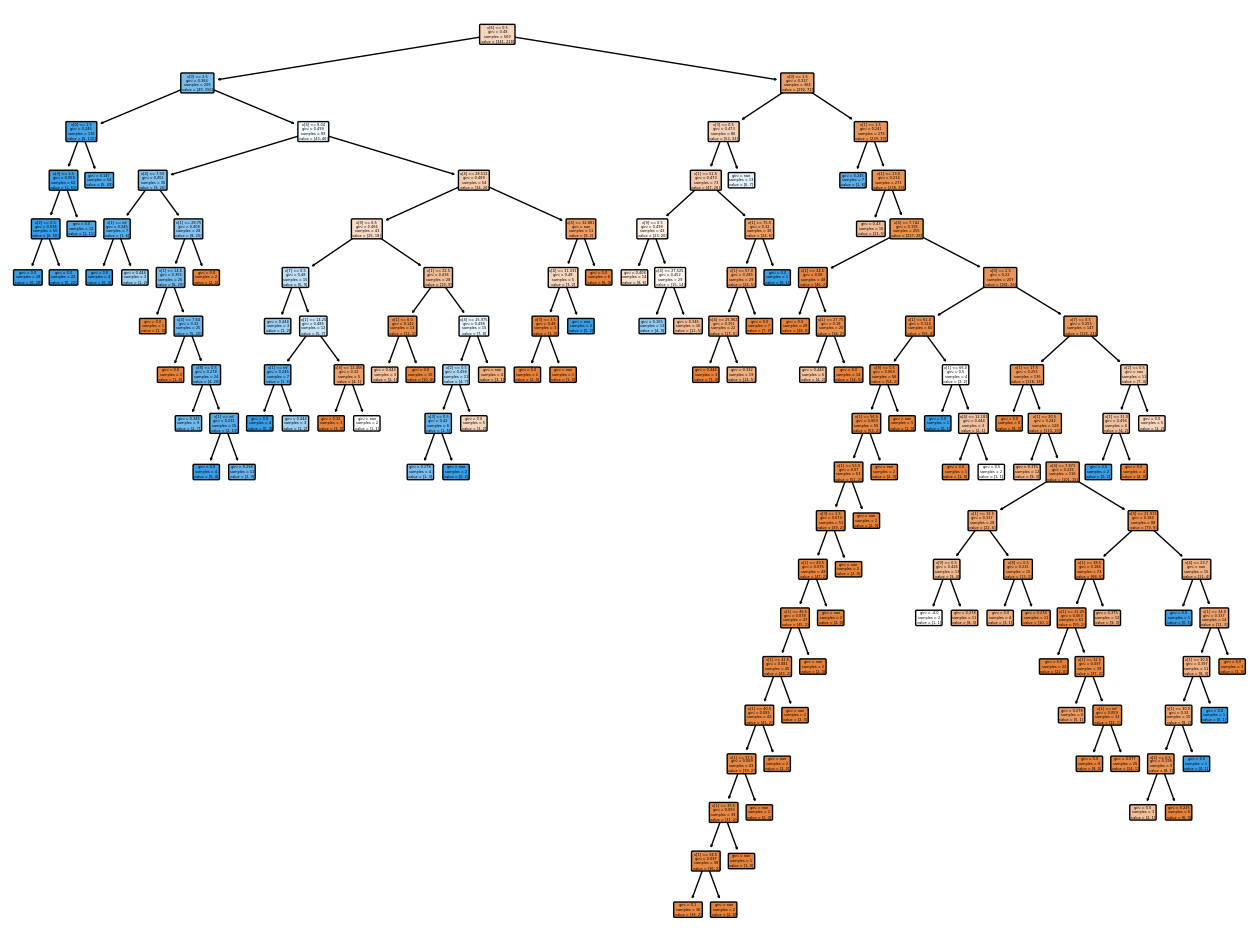

In [458]:
# Plot the decision tree
plt.figure(figsize=(16, 12))
tree.plot_tree(clf_unpruned, filled=True, rounded=True)
plt.show()

In [459]:
# Calculate the accuracy of the model

# Make predictions on the dev set
y_pred_dev = clf_unpruned.predict(X_dev)

# Compute unpruned development accuracy
dev_accuracy_unpruned = accuracy_score(y_dev, y_pred_dev)

# print the accuracy score
print(f'The accurancy of the development set is: {dev_accuracy_unpruned*100}')

The accurancy of the development set is: 74.82517482517483


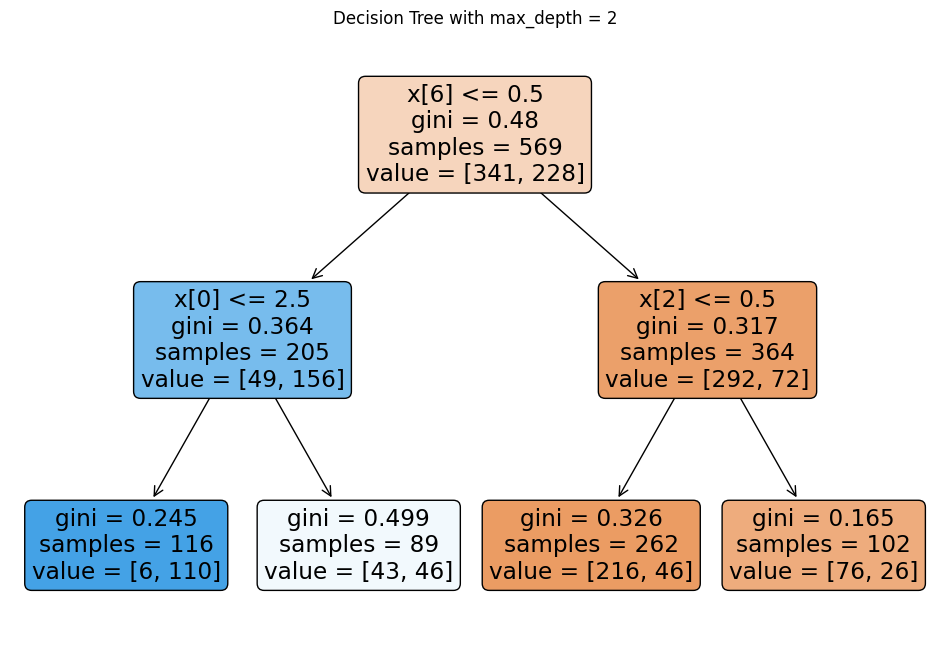

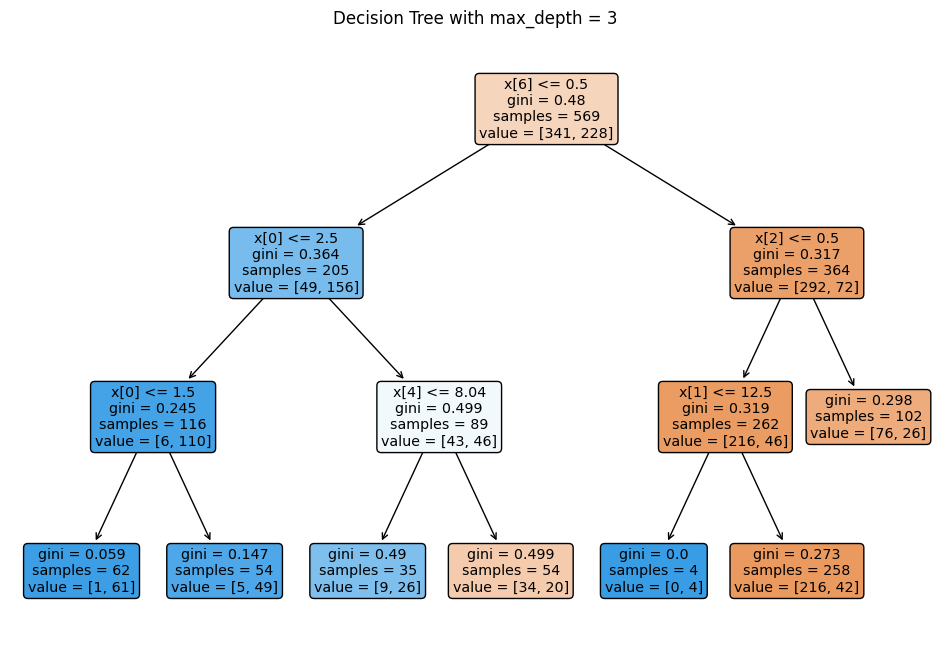

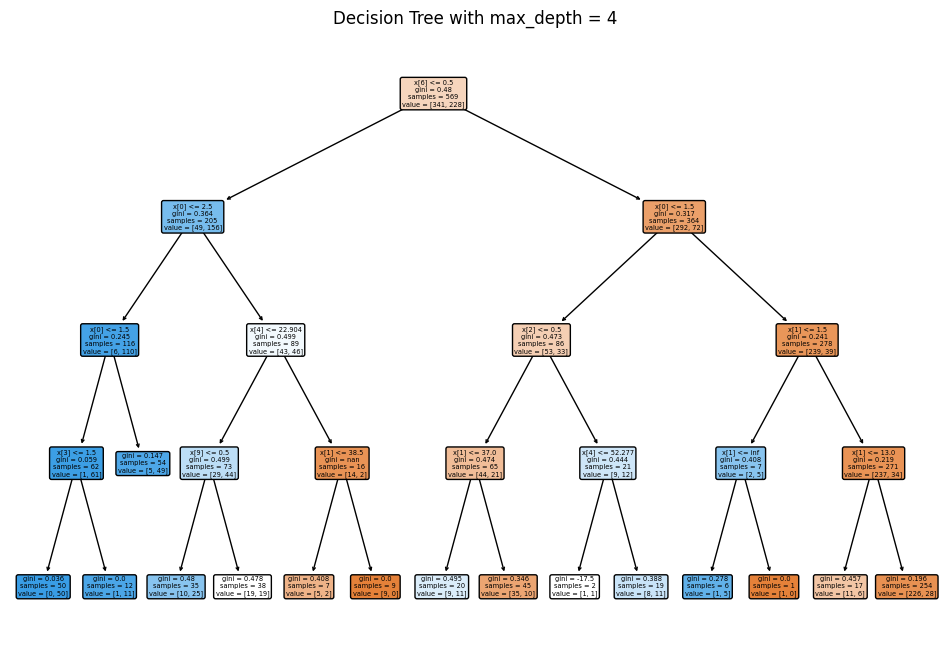

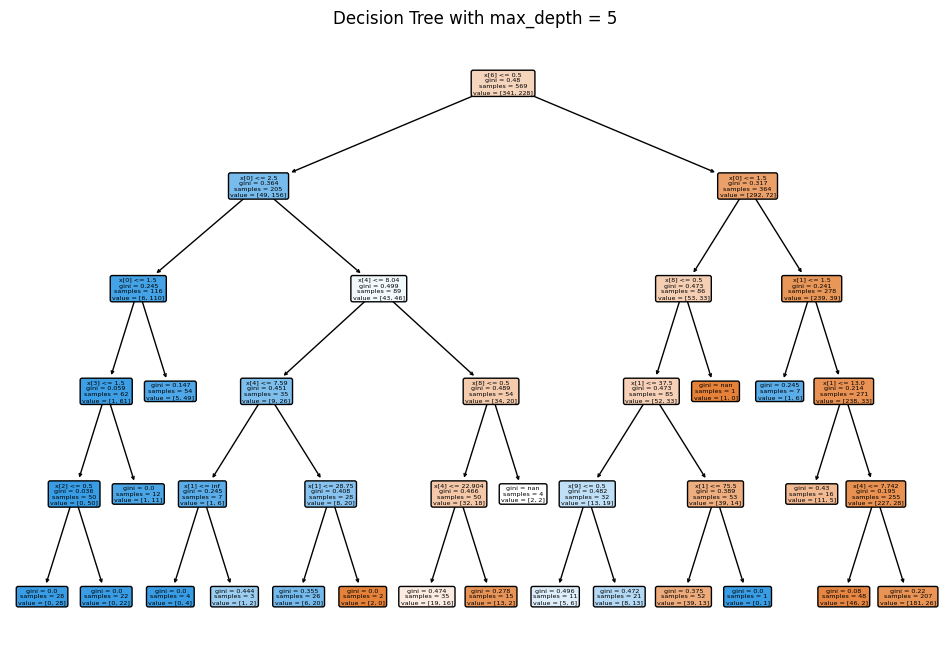

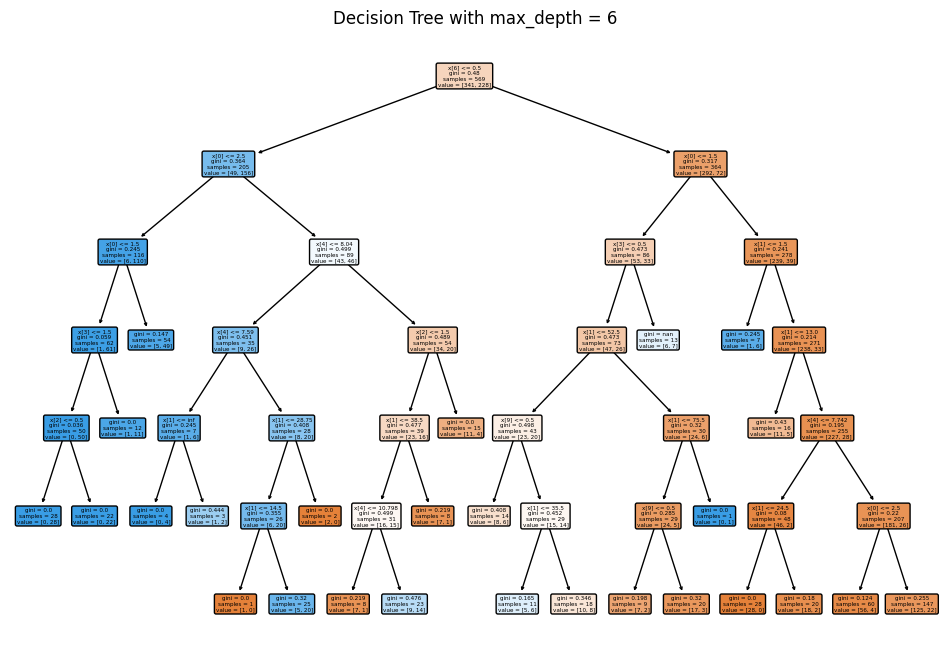

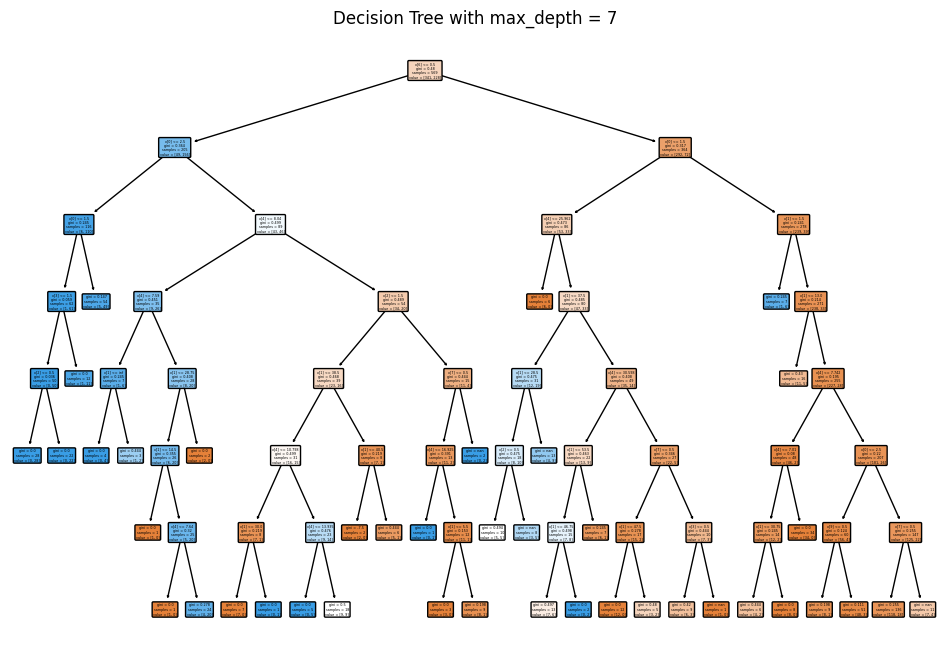

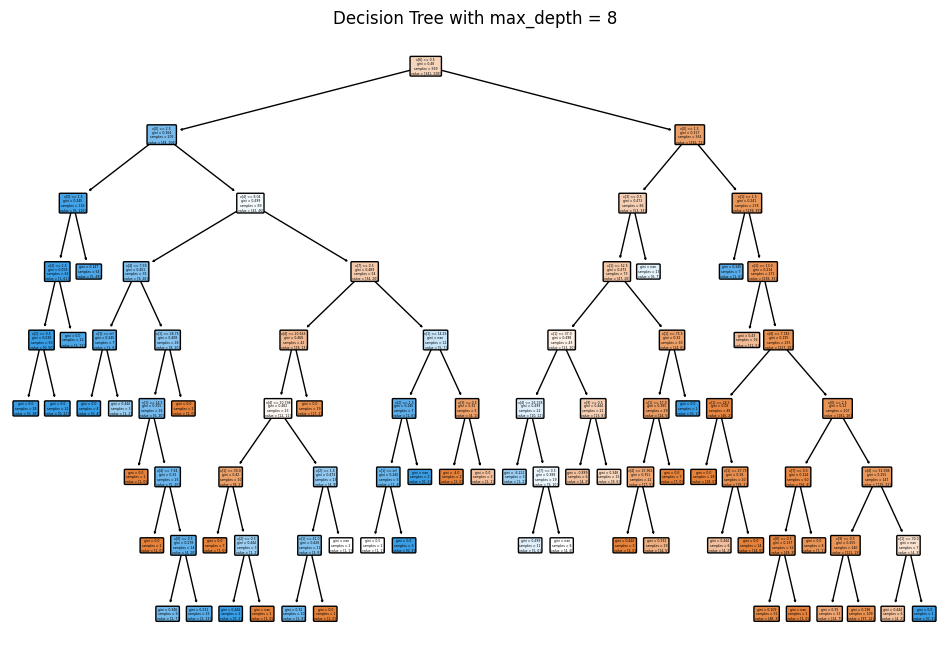

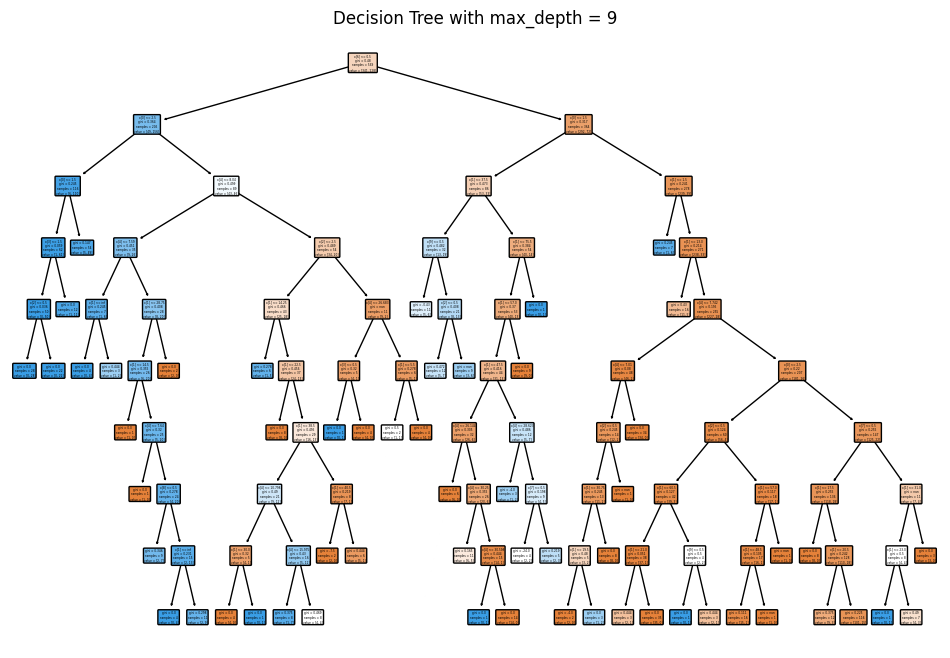

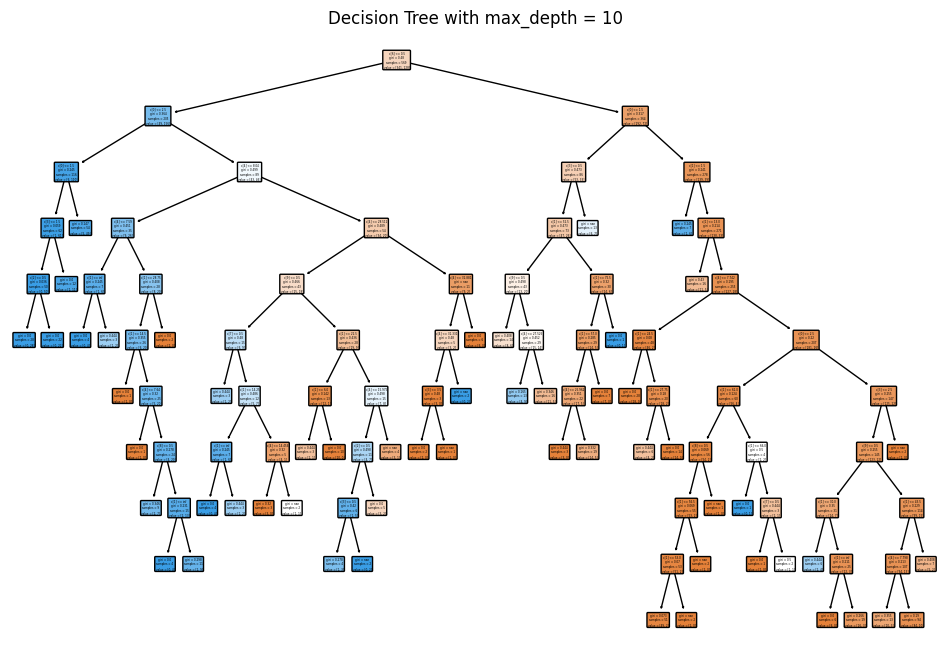

In [460]:
# Range of max_depth values to try
max_depth_values = range(2, 11)

# Lists to store accuracy scores
train_accuracies = []
dev_accuracies = []

# Train a decision tree for each max_depth value
for max_depth in max_depth_values:
    # Train the decision tree classifier
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=r)
    clf.fit(X_train, y_train)
    
    # Make predictions on the training set
    y_train_pred = clf.predict(X_train)
    
    # Compute training accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Make predictions on the development set
    y_dev_pred = clf.predict(X_dev)
    
    # Compute development accuracy
    dev_accuracy = accuracy_score(y_dev, y_dev_pred)
    dev_accuracies.append(dev_accuracy)
    
    # Plot the decision tree
    plt.figure(figsize=(12, 8))
    tree.plot_tree(clf, filled=True, rounded=True)
    plt.title(f"Decision Tree with max_depth = {max_depth}")
    plt.show()

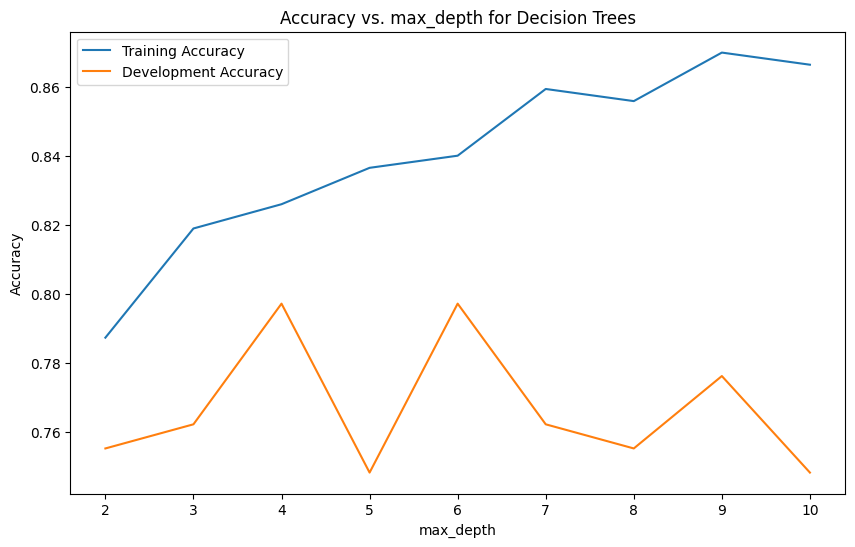

In [461]:
# Plot accuracy vs. max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy')
plt.plot(max_depth_values, dev_accuracies, label='Development Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. max_depth for Decision Trees')
plt.legend()
plt.show()

The development accuracy is lower than the training accuracy. The two lines do not follow the same shape.

In [462]:
# Get max dept of the unpruned tree   
pruned_depths = range(1,clf_unpruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  # Train the decision tree classifier
  pruned_clf = DecisionTreeClassifier(max_depth=d, random_state=r)
  pruned_clf.fit(X_train, y_train)

  # Compute the score of the test set
  score = pruned_clf.score(X_test, y_test)
  pruned_scores.append(score)

# Get the best depth for final model
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

# Train the decision tree classifier
pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(X, y)

Best performance reached at depth of: 3


DecisionTreeClassifier(max_depth=3)

In [463]:
# Make predictions on the test set
y_pred_test = pruned.predict(X_test)

# Compute test accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'The accurancy of the test set is: {accuracy_test*100}')

The accurancy of the test set is: 83.24022346368714


In [464]:
# Import Libraries for BaggingClassifier, IterativeImputer, RandomForestClassifier and AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.impute import IterativeImputer 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Create variable n for n_estimator
n = 100

Create a Bagged, Random Forest, and Boosted tree for the titanic dataset in
the same way that you created a regular Classification Tree.

In [465]:
# Create base model
base = DecisionTreeClassifier(max_depth=5)
ensemble = BaggingClassifier(base_estimator=base, n_estimators=n, random_state=r)

# Fit the data into the models
base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)

# Print base and ensemble accuracy scores
print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy ensemble:",ensemble.score(X_test, y_test))

c:\Program Files\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy base: 0.8324022346368715
Accuracy ensemble: 0.8268156424581006


In [466]:
# Create an IterativeImputer
impute_it = IterativeImputer()

# Fit the data
impute_it.fit(X)

IterativeImputer()

In [469]:
# Transform the daata to eplace all nan values in the X_train and X_test data.
X_train = impute_it.transform(X_train)
X_test = impute_it.transform(X_test)

In [470]:
# Create a boosted tree clasifier
adaModel = AdaBoostClassifier(n_estimators=n, random_state=r)
# Fit the data into the model
adaModel.fit(X_train,y_train)

# Make predictions on x_test 
y_pred = adaModel.predict(X_test)

# Print the accuracy score of the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7932960893854749


From the Random Forest model, determine which of the features is the one that contributes the most to predicting whether a passenger survives or not.

In [471]:
# Create a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=n, random_state=r)
forest.fit(X_train, y_train)

# Get and display feature importances
feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_imp

1    0.261352
4    0.237231
6    0.161254
5    0.136697
0    0.079596
2    0.053887
3    0.037390
9    0.013737
7    0.013259
8    0.005597
dtype: float64

Feature 1 is the one that has the most importance in determining survival. This feature is age. 

Pick one of these methods, and tune the parameters n_estimators and max_depth.

In [472]:
# Create base model
base = DecisionTreeClassifier(max_depth=4)
ensemble = BaggingClassifier(base_estimator=base, n_estimators=80, random_state=r)

# Fit the data into the models
base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)

# Print base and ensemble accuracy scores
print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy ensemble:",ensemble.score(X_test, y_test))

Accuracy base: 0.8603351955307262
Accuracy ensemble: 0.8547486033519553


c:\Program Files\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [473]:
# Create a boosted tree clasifier
adaModel = AdaBoostClassifier(n_estimators=90, random_state=r)
adaModel.fit(X_train,y_train)

# Make predictions on x_test 
y_pred = adaModel.predict(X_test)

# Print the accuracy score of the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8100558659217877


Report the accuracy of all models and report which model performed the best, including the values for n_estimators and max_depth that the best model had.

In [474]:
print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy ensemble:",ensemble.score(X_test, y_test))
print(f'Accuracy boosted: {accuracy_score(y_test, y_pred)}')

Accuracy base: 0.8603351955307262
Accuracy ensemble: 0.8547486033519553
Accuracy boosted: 0.8100558659217877


The best performing model is the base model with a max-depth of 4 and n_estimator of 80.